In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [6]:
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\Imarticus\logistic_regression\winequality-red.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.shape

(1599, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
duplicate = df.duplicated()
print(df[duplicate])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.shape

(1359, 12)

# EDA

### Histograms

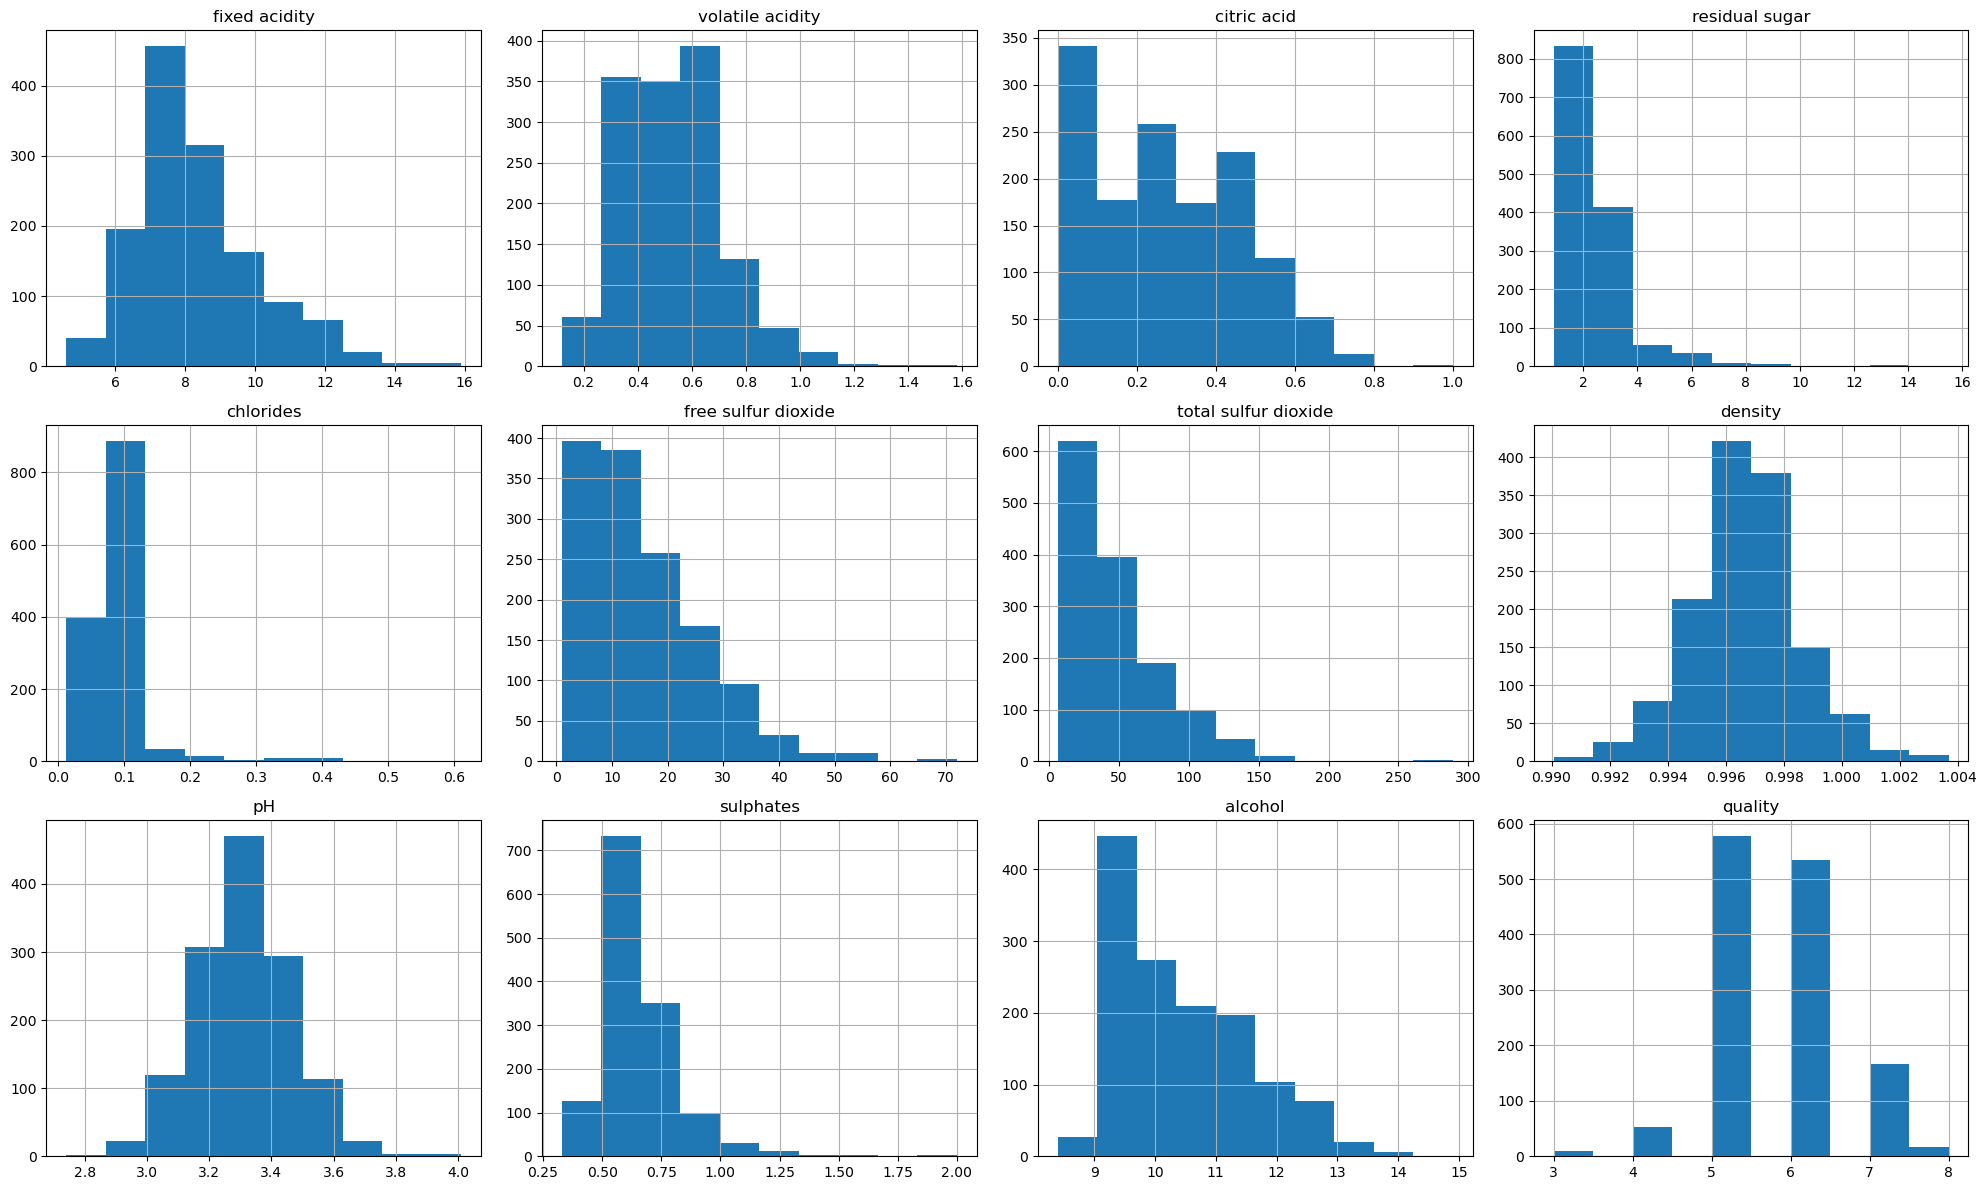

In [27]:
# Adjust the number of rows and columns as needed
num_cols = len(df.columns)
rows = 3
cols = (num_cols // rows) + (num_cols % rows > 0)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 4*rows))

for i, col in enumerate(df.columns):
    df[col].hist(ax=axes[i // cols, i % cols])
    axes[i // cols, i % cols].set_title(col)

plt.tight_layout()
plt.show()


#### Correlation

<Axes: >

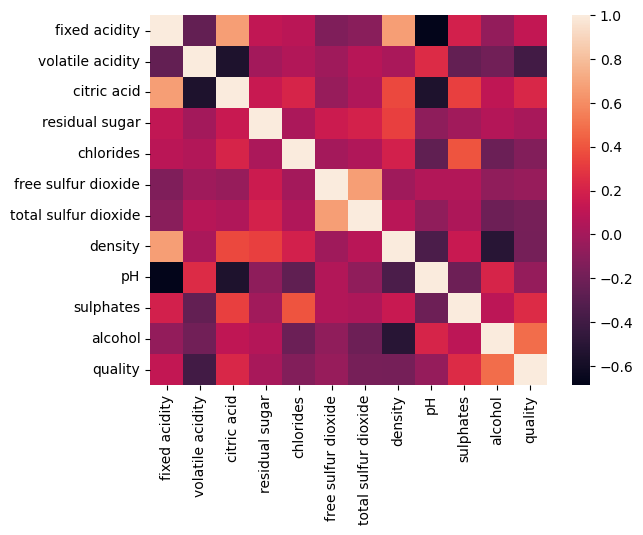

In [29]:
sns.heatmap(df.corr())

<Axes: >

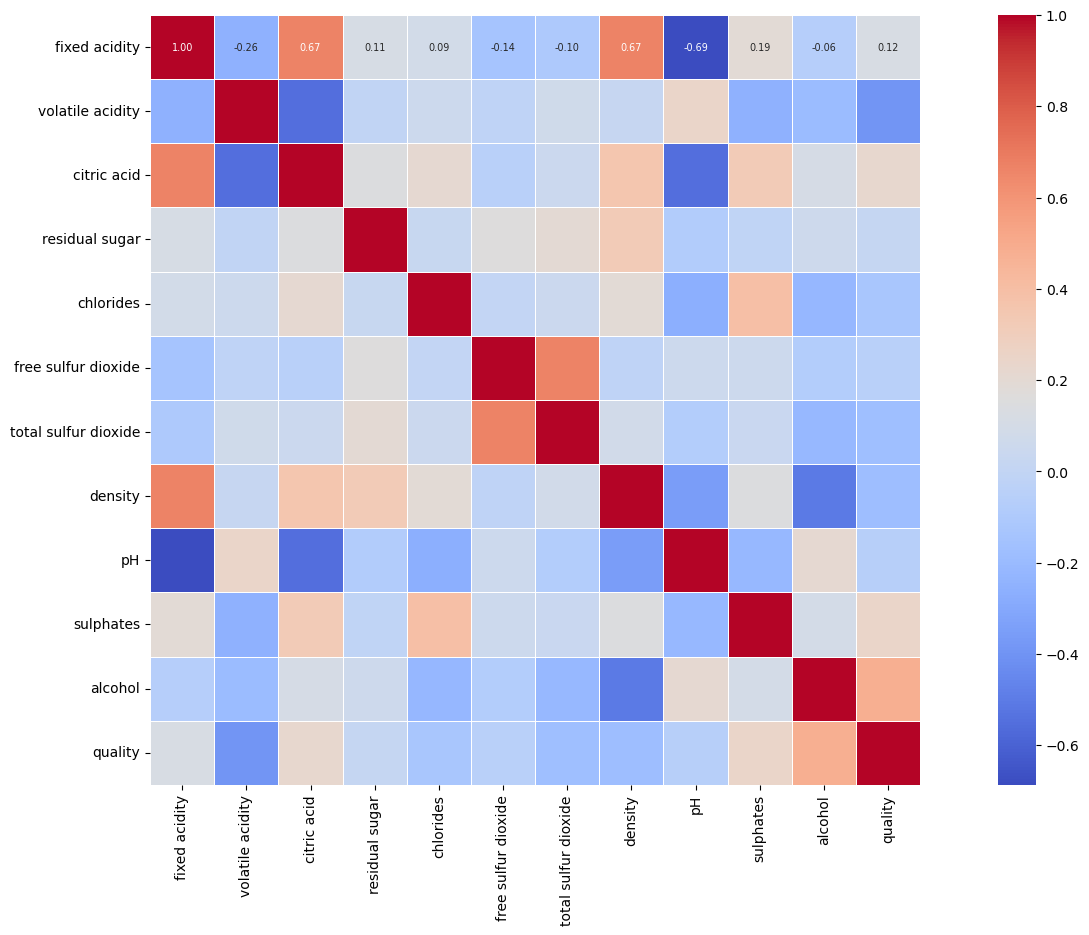

In [31]:
matrix = df.corr()
fig = plt.subplots(figsize = (20,10))
sns.heatmap(matrix,cmap = 'coolwarm',square=True, annot = True,fmt = ',.2f',annot_kws={'size':'x-small'},
           linewidths=0.5)

### Bar Plots

<Axes: xlabel='quality', ylabel='alcohol'>

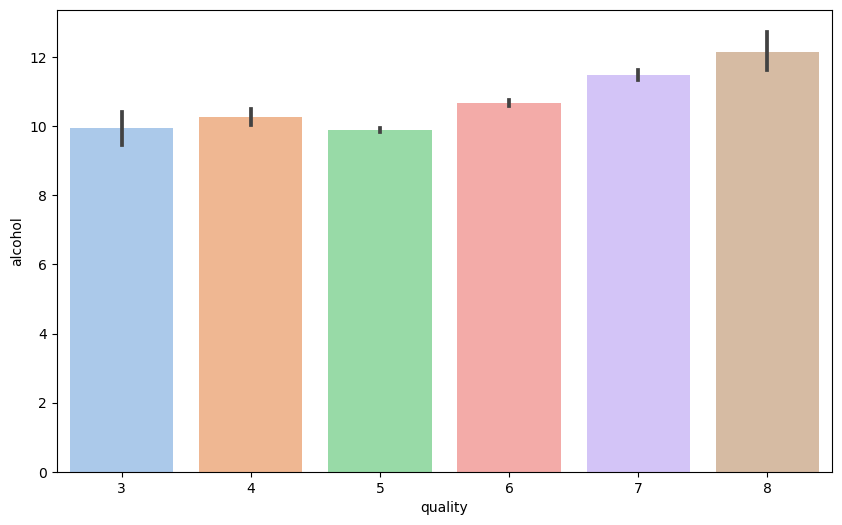

In [33]:
# Plotting the distribution of alcohol vs quality
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=df, palette='pastel')

<Axes: xlabel='quality', ylabel='volatile acidity'>

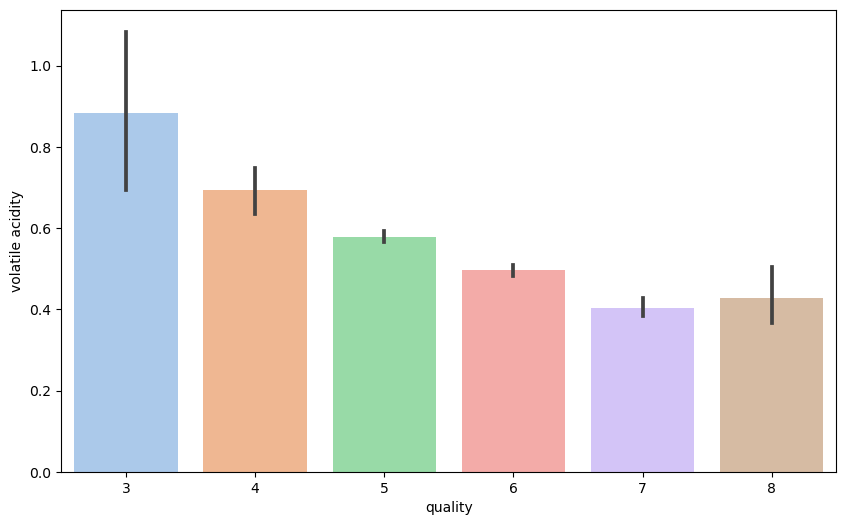

In [35]:
# Plotting the distribution of 'volatile acidity' vs 'quality'

fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y ='volatile acidity', data= df , palette = 'pastel')

## Performing labelEncoding

In [44]:
# dividing quality into 'good' and 'bad'
bins = (1,5,10)
group_name = ['bad' , 'good']
df["quality"] =  pd.cut(df["quality"], bins = bins, labels = group_name)

TypeError: '<' not supported between instances of 'int' and 'str'

In [46]:
df['quality']

0        bad
1        bad
2        bad
3       good
5        bad
        ... 
1593    good
1594     bad
1595    good
1597     bad
1598    good
Name: quality, Length: 1359, dtype: category
Categories (2, object): ['bad' < 'good']

In [50]:
# assigning labels to 'quality'
# bad = 0 good = 1

from sklearn.preprocessing import LabelEncoder

quality_label = LabelEncoder()
df['quality'] = quality_label.fit_transform(df['quality'])

In [52]:
df['quality'].value_counts()

quality
1    719
0    640
Name: count, dtype: int64

## Separating training and testing data


In [57]:
x = df.drop('quality', axis=1)
y = df['quality']

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Perform scaling

In [64]:
from  sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## ML Models

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [78]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [80]:
log_pred = logreg.predict(x_test)

In [82]:
#checking the scores

print('Confusion matrix')
print(confusion_matrix(y_test,log_pred))
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred))
print('Recall:',recall_score(y_test,log_pred))

Confusion matrix
[[100  35]
 [ 30 107]]
Accuracy: 0.7610294117647058
Precision: 0.7535211267605634
Recall: 0.781021897810219


In [84]:
print('Classification report:')
print(classification_report(y_test,log_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       135
           1       0.75      0.78      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

